In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN, A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(42)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 67       |
|    ep_rew_mean        | -45.7    |
| time/                 |          |
|    fps                | 350      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.1     |
|    explained_variance | 0.0431   |
|    learning_rate      | 0.001    |
|    n_updates          | 99       |
|    policy_loss        | -0.0766  |
|    value_loss         | 0.00696  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 80.5     |
|    ep_rew_mean        | -44.2    |
| time/                 |          |
|    fps                | 292      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 131      |
|    ep_rew_mean        | -32.3    |
| time/                 |          |
|    fps                | 241      |
|    iterations         | 1400     |
|    time_elapsed       | 29       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.564   |
|    explained_variance | 0.481    |
|    learning_rate      | 0.001    |
|    n_updates          | 1399     |
|    policy_loss        | -0.0206  |
|    value_loss         | 0.00459  |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 124       |
|    ep_rew_mean        | -28.8     |
| time/                 |           |
|    fps                | 236       |
|    iterations         | 1500      |
|    time_elapsed       | 31        |
|    total_timesteps    | 7500      |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 116       |
|    ep_rew_mean        | 5.6       |
| time/                 |           |
|    fps                | 224       |
|    iterations         | 2700      |
|    time_elapsed       | 60        |
|    total_timesteps    | 13500     |
| train/                |           |
|    entropy_loss       | -0.0969   |
|    explained_variance | -4.73e+10 |
|    learning_rate      | 0.001     |
|    n_updates          | 2699      |
|    policy_loss        | -0.00817  |
|    value_loss         | 0.241     |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 109      |
|    ep_rew_mean        | 9.3      |
| time/                 |          |
|    fps                | 223      |
|    iterations         | 2800     |
|    time_elapsed       | 62       |
|    total_timesteps    | 14000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 121      |
|    ep_rew_mean        | 29.9     |
| time/                 |          |
|    fps                | 223      |
|    iterations         | 4000     |
|    time_elapsed       | 89       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.00857 |
|    explained_variance | 0.898    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.00759  |
|    value_loss         | 20       |
------------------------------------


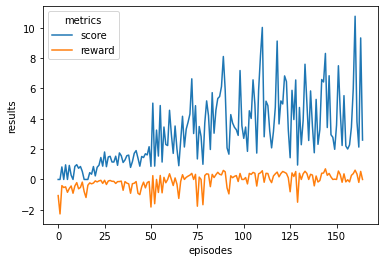

In [3]:
# enable_render=True turns on the display
snake_env = SnakeEnv(440, 440, enable_render=False)
env = make_vec_env(lambda: snake_env, n_envs=1)

model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42)
model.learn(total_timesteps=20000, log_interval=1000)

# Print rewards and scores for each episode
plot_metrics(snake_env.results)

In [7]:
snake_env.record

12

In [5]:
len(snake_env.results['score'])

165

In [6]:
snake_env = SnakeEnv(440, 440, enable_render=True)
env = make_vec_env(lambda: snake_env, n_envs=1)
obs = env.reset()

while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

KeyboardInterrupt: 